In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

os.chdir('C:\\Users\\Khizar\\Desktop\\Semester - Spring 2021\\5 - Machine Learning 4375\\CSV')
path = os.getcwd()
path

df = pd.read_csv('titanic.csv')

In [2]:
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1310 entries, 0 to 1309
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   float64
 1   survived   1309 non-null   float64
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   float64
 6   parch      1309 non-null   float64
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(7), object(7)
memory usage: 143.4+ KB


In [4]:
# check how much is missing
df.isna().sum()

pclass          1
survived        1
name            1
sex             1
age           264
sibsp           1
parch           1
ticket          1
fare            2
cabin        1015
embarked        3
boat          824
body         1189
home.dest     565
dtype: int64

In [7]:
df.drop(['cabin', 'body', 'boat', 'home.dest'], axis=1)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,S
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,S
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,S
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,S
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,S
...,...,...,...,...,...,...,...,...,...,...
1305,3.0,0.0,"Zabour, Miss. Thamine",female,NaN,1.0,0.0,2665,14.4542,C
1306,3.0,0.0,"Zakarian, Mr. Mapriededer",male,26.5000,0.0,0.0,2656,7.2250,C
1307,3.0,0.0,"Zakarian, Mr. Ortin",male,27.0000,0.0,0.0,2670,7.2250,C
1308,3.0,0.0,"Zimmerman, Mr. Leo",male,29.0000,0.0,0.0,315082,7.8750,S


In [10]:
def impute_age(cols):   
       Age = cols[0]    
       Pclass = cols[1]       
       if pd.isnull(Age):
            if Pclass == 1:           
                return 37
            elif Pclass == 2:           
                return 29
            else:           
                return 24
       else: return Age

In [11]:
df.tail()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
1305,3.0,0.0,"Zabour, Miss. Thamine",female,NaN,1.0,0.0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3.0,0.0,"Zakarian, Mr. Mapriededer",male,26.5,0.0,0.0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3.0,0.0,"Zakarian, Mr. Ortin",male,27.0,0.0,0.0,2670,7.2250,NaN,C,NaN,NaN,NaN
1308,3.0,0.0,"Zimmerman, Mr. Leo",male,29.0,0.0,0.0,315082,7.8750,NaN,S,NaN,NaN,NaN
1309,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [13]:
df = df.drop(['cabin', 'body', 'boat', 'home.dest'], axis=1)

In [14]:
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,S
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,S
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,S
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,S
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,S


In [15]:
df.tail()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked
1305,3.0,0.0,"Zabour, Miss. Thamine",female,NaN,1.0,0.0,2665,14.4542,C
1306,3.0,0.0,"Zakarian, Mr. Mapriededer",male,26.5,0.0,0.0,2656,7.2250,C
1307,3.0,0.0,"Zakarian, Mr. Ortin",male,27.0,0.0,0.0,2670,7.2250,C
1308,3.0,0.0,"Zimmerman, Mr. Leo",male,29.0,0.0,0.0,315082,7.8750,S
1309,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
df = df.dropna()

In [17]:
df.tail()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked
1301,3.0,0.0,"Youseff, Mr. Gerious",male,45.5,0.0,0.0,2628,7.2250,C
1304,3.0,0.0,"Zabour, Miss. Hileni",female,14.5,1.0,0.0,2665,14.4542,C
1306,3.0,0.0,"Zakarian, Mr. Mapriededer",male,26.5,0.0,0.0,2656,7.2250,C
1307,3.0,0.0,"Zakarian, Mr. Ortin",male,27.0,0.0,0.0,2670,7.2250,C
1308,3.0,0.0,"Zimmerman, Mr. Leo",male,29.0,0.0,0.0,315082,7.8750,S


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1043 entries, 0 to 1308
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1043 non-null   float64
 1   survived  1043 non-null   float64
 2   name      1043 non-null   object 
 3   sex       1043 non-null   object 
 4   age       1043 non-null   float64
 5   sibsp     1043 non-null   float64
 6   parch     1043 non-null   float64
 7   ticket    1043 non-null   object 
 8   fare      1043 non-null   float64
 9   embarked  1043 non-null   object 
dtypes: float64(6), object(4)
memory usage: 89.6+ KB


In [19]:
df['sex'].unique()

array(['female', 'male'], dtype=object)

In [20]:
df['pclass'].unique()

array([1., 2., 3.])

In [21]:
def impute_age(cols):   
       age = cols[0]    
       pclass = cols[1]       
       if pd.isnull(age):
            if pclass == 1:           
                return 37
            elif pclass == 2:           
                return 29
            else:           
                return 24
       else: return age

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1043 entries, 0 to 1308
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1043 non-null   float64
 1   survived  1043 non-null   float64
 2   name      1043 non-null   object 
 3   sex       1043 non-null   object 
 4   age       1043 non-null   float64
 5   sibsp     1043 non-null   float64
 6   parch     1043 non-null   float64
 7   ticket    1043 non-null   object 
 8   fare      1043 non-null   float64
 9   embarked  1043 non-null   object 
dtypes: float64(6), object(4)
memory usage: 89.6+ KB


In [23]:
df['embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [24]:
pd.get_dummies(df)

,pclass,survived,age,sibsp,parch,fare,"name_Abbing, Mr. Anthony","name_Abbott, Master. Eugene Joseph","name_Abbott, Mr. Rossmore Edward","name_Abbott, Mrs. Stanton (Rosa Hunt)",...,ticket_W./C. 14260,ticket_W./C. 14263,ticket_W./C. 14266,ticket_W./C. 6608,ticket_W.E.P. 5734,ticket_W/C 14208,ticket_WE/P 5735,embarked_C,embarked_Q,embarked_S
0,1.0,1.0,29.0000,0.0,0.0,211.3375,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1.0,1.0,0.9167,1.0,2.0,151.5500,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,1.0,0.0,2.0000,1.0,2.0,151.5500,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1.0,0.0,30.0000,1.0,2.0,151.5500,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,1.0,0.0,25.0000,1.0,2.0,151.5500,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1301,3.0,0.0,45.5000,0.0,0.0,7.2250,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1304,3.0,0.0,14.5000,1.0,0.0,14.4542,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1306,3.0,0.0,26.5000,0.0,0.0,7.2250,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1307,3.0,0.0,27.0000,0.0,0.0,7.2250,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [25]:
x = pd.get_dummies(df.drop('survived',axis=1),drop_first=True)
y = df['survived']

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [27]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 101)


In [28]:
from sklearn.tree import DecisionTreeClassifier


In [29]:
model = DecisionTreeClassifier()


In [30]:
model.fit(x_train,y_train)


DecisionTreeClassifier()

In [31]:
base_pred = model.predict(x_test)


In [32]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, plot_confusion_matrix


In [33]:
confusion_matrix(y_test, base_pred)


array([[157,  21],
       [ 33, 102]], dtype=int64)

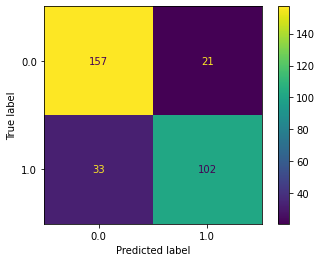

In [34]:
plot_confusion_matrix(model,x_test,y_test)


In [35]:
df.groupby('survived').count()


,pclass,name,sex,age,sibsp,parch,ticket,fare,embarked
survived,,,,,,,,,
0.0,618,618,618,618,618,618,618,618,618
1.0,425,425,425,425,425,425,425,425,425


In [36]:
model.feature_importances_

array([0.09650369, 0.07214284, 0.03669849, ..., 0.        , 0.        ,
       0.        ])

In [37]:
pd.DataFrame(index=x.columns, data=model.feature_importances_,columns=['Feature Importance'])

,Feature Importance
pclass,0.096504
age,0.072143
sibsp,0.036698
parch,0.009105
fare,0.084586
...,...
ticket_W.E.P. 5734,0.000000
ticket_W/C 14208,0.000000
ticket_WE/P 5735,0.000000
embarked_Q,0.000000


<AxesSubplot:xlabel='survived', ylabel='pclass'>

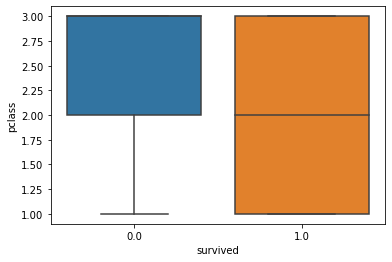

In [38]:
sns.boxplot(x='survived',y='pclass',data=df)


<AxesSubplot:xlabel='survived', ylabel='sex'>

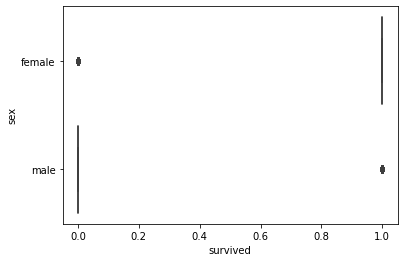

In [39]:
sns.boxplot(x='survived',y='sex',data=df)

<AxesSubplot:xlabel='survived', ylabel='age'>

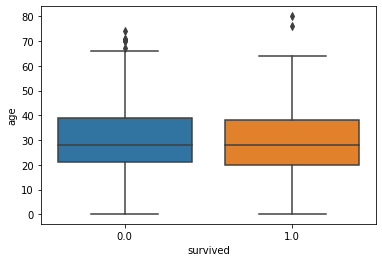

In [40]:
sns.boxplot(x='survived',y='age',data=df)


<AxesSubplot:xlabel='survived', ylabel='embarked'>

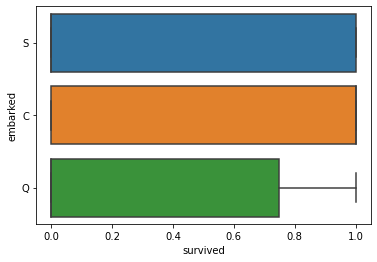

In [41]:
sns.boxplot(x='survived',y='embarked',data=df)


In [42]:
from sklearn.tree import plot_tree


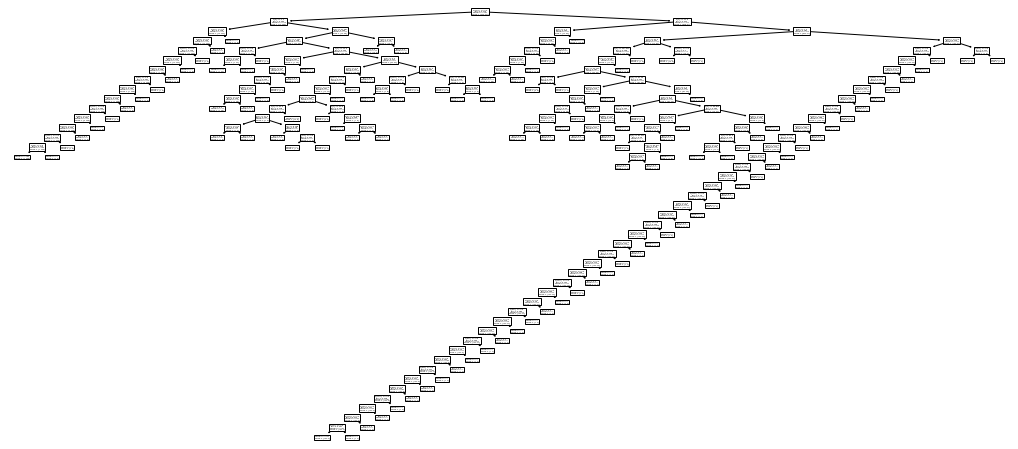

In [43]:
plt.figure(figsize=(18,8)) # Control Figure Size
plot_tree(model);

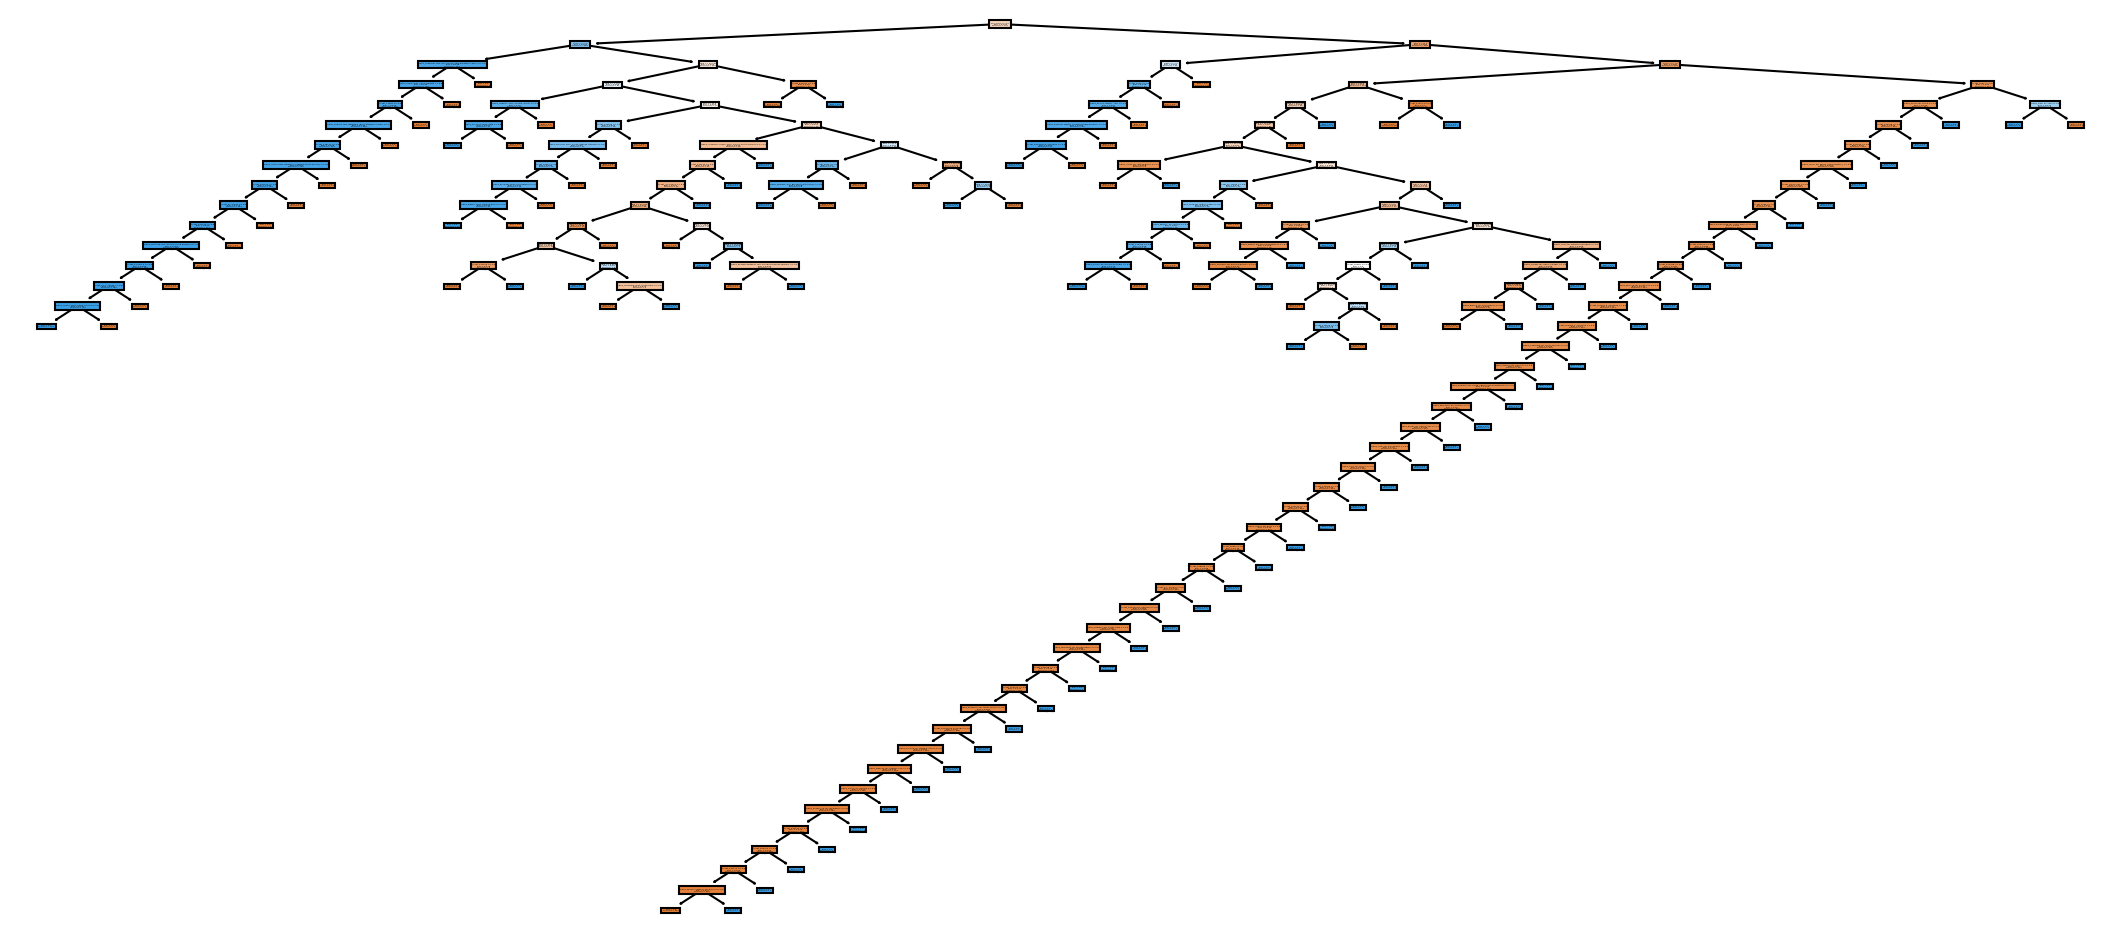

In [44]:
plt.figure(figsize=(18,8), dpi = 150) # Control Figure Size and DPI attributes
plot_tree(model, filled = True, feature_names = x.columns);

In [45]:
def report_model(model):
    model_preds = model.predict(x_test)
    print(classification_report(y_test,model_preds))
    print('\n')
    plt.figure(figsize=(12,8),dpi=150)
    plot_tree(model, filled = True, feature_names = x.columns);

In [46]:
pruned_tree = DecisionTreeClassifier(max_depth=2)
pruned_tree.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=2)

              precision    recall  f1-score   support

         0.0       0.74      0.93      0.83       178
         1.0       0.87      0.58      0.69       135

    accuracy                           0.78       313
   macro avg       0.81      0.76      0.76       313
weighted avg       0.80      0.78      0.77       313





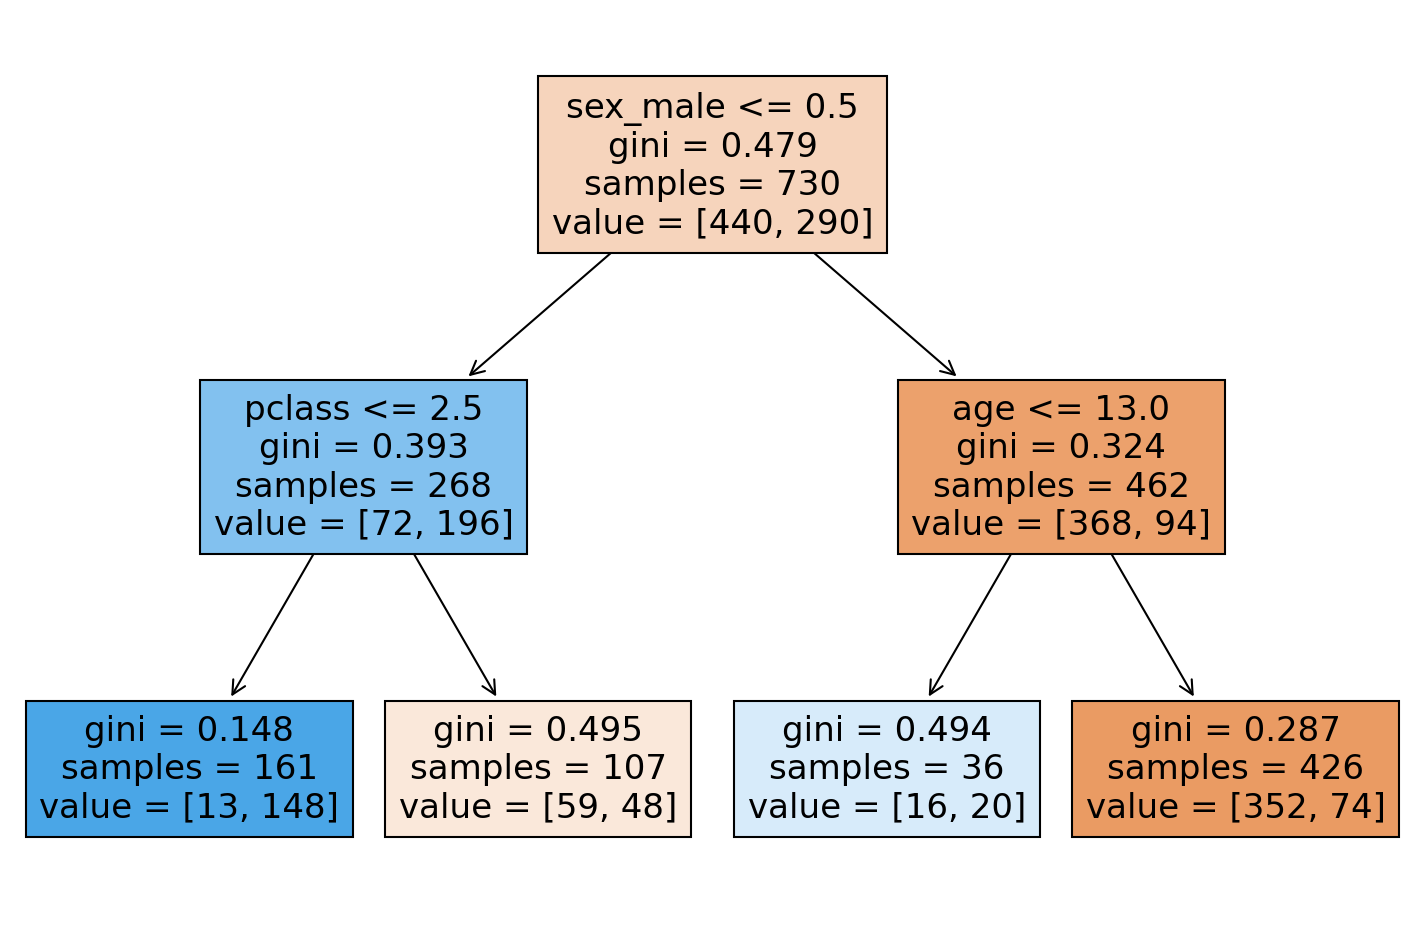

In [47]:
report_model(pruned_tree)


In [48]:
# instance of DecisionTreeClassifier
entropy_tree = DecisionTreeClassifier(criterion ='entropy')
# Fit x train and y train
entropy_tree.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

              precision    recall  f1-score   support

         0.0       0.80      0.90      0.85       178
         1.0       0.84      0.70      0.77       135

    accuracy                           0.81       313
   macro avg       0.82      0.80      0.81       313
weighted avg       0.82      0.81      0.81       313





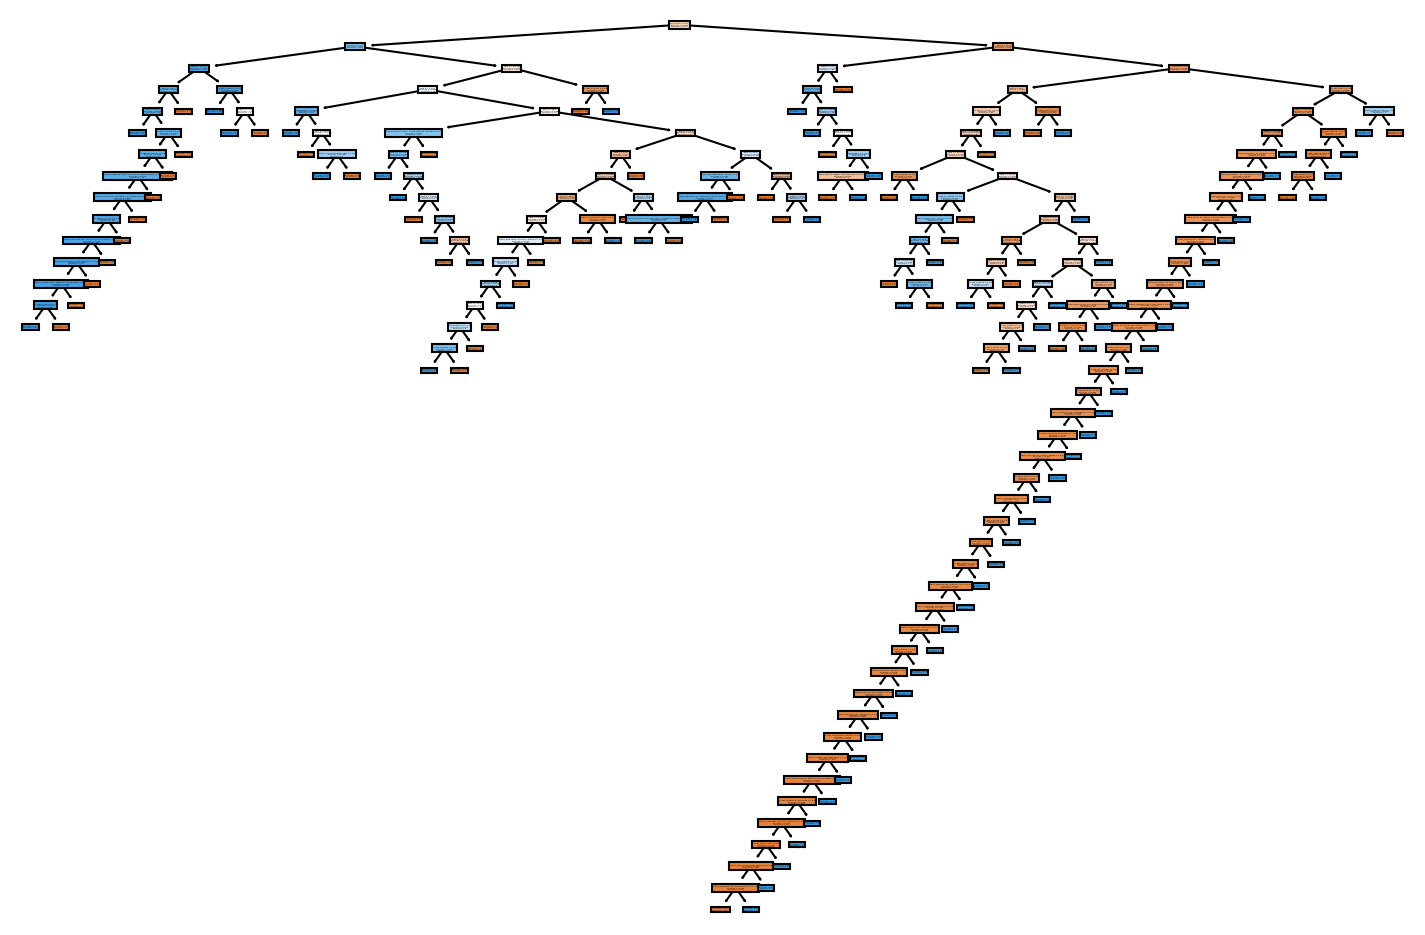

In [49]:
report_model(entropy_tree)

In [50]:
# instance of DecisionTreeClassifier
entropy_tree = DecisionTreeClassifier(criterion ='entropy', max_depth=2)
# Fit x train and y train
entropy_tree.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2)

              precision    recall  f1-score   support

         0.0       0.74      0.93      0.83       178
         1.0       0.87      0.58      0.69       135

    accuracy                           0.78       313
   macro avg       0.81      0.76      0.76       313
weighted avg       0.80      0.78      0.77       313





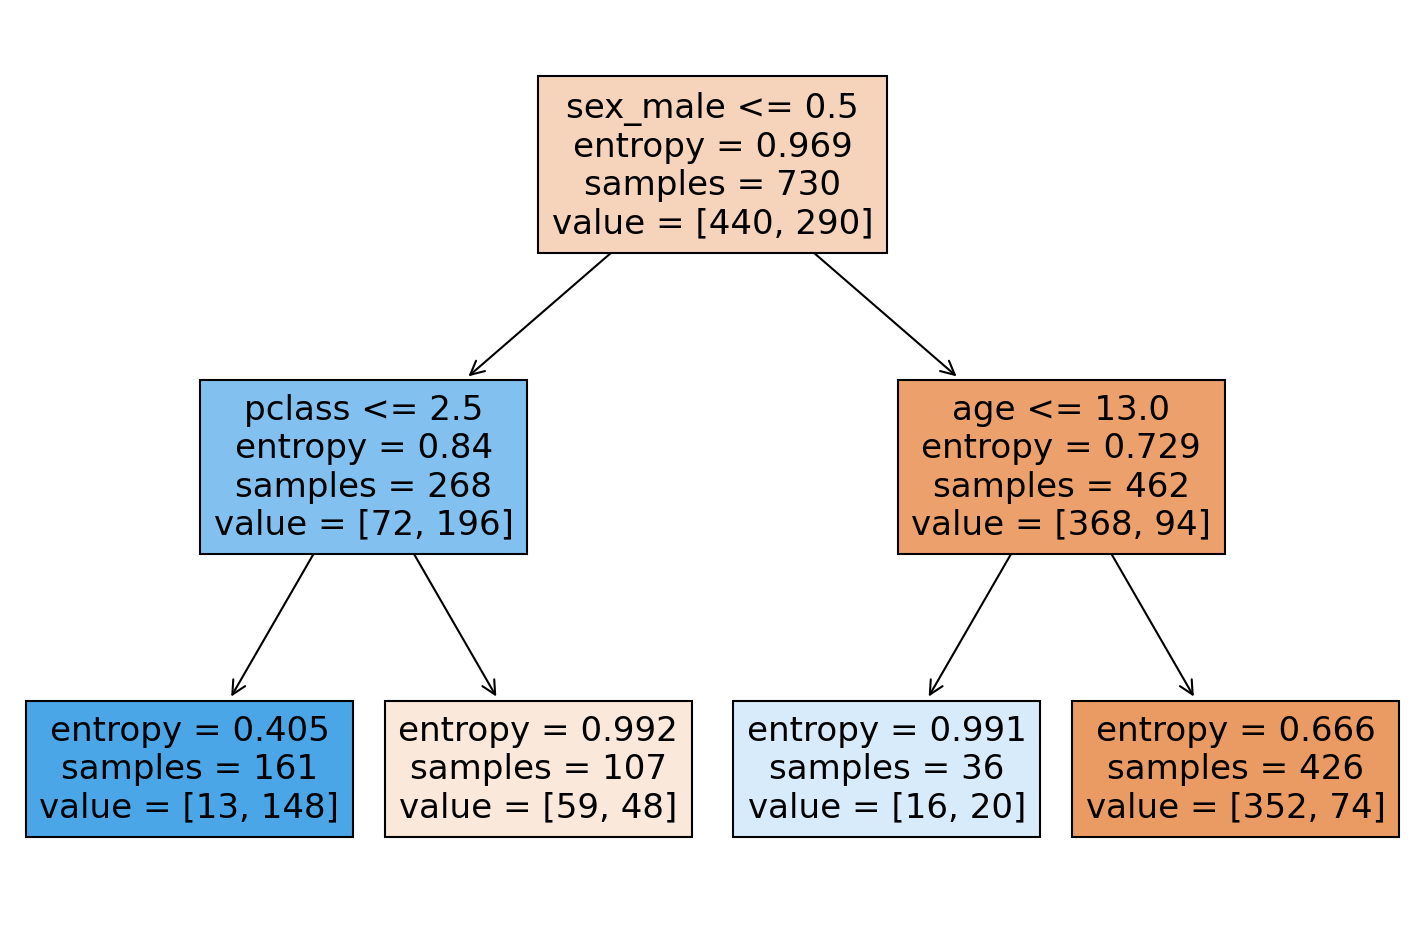

In [51]:
report_model(entropy_tree)